#Basic Overview about the LLM Architecture
Made by: Wilfredo Aaron Sosa Ramos

##1. Encoder, Decoder and Encoder-Decoder Transformer Architecture:

In [ ]:
##############################################################################
# 1) Test the Encoder ONLY (using BERT)
##############################################################################
import torch
from transformers import BertTokenizer, BertModel

# Load tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_encoder = BertModel.from_pretrained("bert-base-uncased")

# Sample text
text = "Hello, how are you today?"
inputs = bert_tokenizer(text, return_tensors="pt")

# Forward pass through BERT (encoder-only)
with torch.no_grad():
    encoder_outputs = bert_encoder(**inputs)
    # 'last_hidden_state' has shape [batch_size, sequence_length, hidden_size]
    print("BERT Encoder output shape:", encoder_outputs.last_hidden_state.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT Encoder output shape: torch.Size([1, 9, 768])


In [ ]:
encoder_outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0547, -0.0706, -0.3246,  ..., -0.3943,  0.2557,  0.4273],
         [ 0.0735, -0.3457,  0.0202,  ..., -0.0116,  1.0509,  0.2148],
         [-0.6531,  0.2092,  0.5213,  ..., -0.4435,  0.4515,  0.0765],
         ...,
         [-0.4440, -1.0098, -0.5836,  ..., -0.0605, -0.0371, -0.3787],
         [-0.3570, -0.9474, -0.8352,  ...,  0.2087,  0.2104, -0.1608],
         [ 0.5717, -0.1605, -0.3361,  ...,  0.2574, -0.3897, -0.2416]]]), pooler_output=tensor([[-0.9424, -0.4334, -0.9196,  0.8713,  0.6766, -0.1917,  0.9299,  0.2633,
         -0.8317, -1.0000, -0.5710,  0.9712,  0.9825,  0.6200,  0.9626, -0.8797,
         -0.6761, -0.6302,  0.2936, -0.5949,  0.7699,  1.0000,  0.0224,  0.3540,
          0.4960,  0.9964, -0.8975,  0.9637,  0.9760,  0.7351, -0.7624,  0.1136,
         -0.9923, -0.1914, -0.9337, -0.9934,  0.3956, -0.7955, -0.0567,  0.0613,
         -0.9255,  0.2890,  1.0000,  0.0337,  0.5397, -0.2861, -1.0000,  0.

In [ ]:
##############################################################################
# 2) Test the Decoder ONLY (using GPT-2)
##############################################################################
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load tokenizer and model
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# IMPORTANT: GPT-2 expects special tokens, so we might need padding & EOS tokens
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")

# Sample prompt
prompt = "Once upon a time,"
inputs = gpt2_tokenizer(prompt, return_tensors="pt")

# Forward pass through GPT-2 (decoder-only)
with torch.no_grad():
    decoder_outputs = gpt2_model(**inputs)
    # 'logits' has shape [batch_size, sequence_length, vocab_size]
    print("GPT-2 Decoder logits shape:", decoder_outputs.logits.shape)

# Generate continuation (inference) just to demonstrate decoder usage
generated_ids = gpt2_model.generate(
    **inputs,
    max_length=30,
    num_return_sequences=1
)
print("Generated text:", gpt2_tokenizer.decode(generated_ids[0]))

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT-2 Decoder logits shape: torch.Size([1, 5, 50257])
Generated text: Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was


In [ ]:
##############################################################################
# 3) Encoder-Decoder Transformer Architecture with BERT (Encoder) and GPT-2 (Decoder)
##############################################################################
import torch
from torch import nn
from transformers import (
    BertModel,
    GPT2LMHeadModel,
    GPT2Config,
    BertTokenizer,
    GPT2Tokenizer
)

class BertGpt2EncoderDecoder(nn.Module):
    """
    Simple encoder-decoder structure that uses:
     - BERT as the encoder.
     - GPT-2 (with cross-attention enabled) as the decoder.
    """
    def __init__(self, bert_name="bert-base-uncased", gpt_name="gpt2"):
        super().__init__()

        # Load BERT as encoder
        self.encoder = BertModel.from_pretrained(bert_name)

        # Configure GPT-2 to have cross-attention
        gpt2_config = GPT2Config.from_pretrained(gpt_name)
        gpt2_config.add_cross_attention = True

        # Load GPT-2 as decoder with cross-attention
        self.decoder = GPT2LMHeadModel.from_pretrained(gpt_name, config=gpt2_config)

    def forward(self, input_ids_encoder, attention_mask_encoder, input_ids_decoder):
        """
        input_ids_encoder: [batch_size, enc_seq_len]
        attention_mask_encoder: [batch_size, enc_seq_len]
        input_ids_decoder: [batch_size, dec_seq_len]
        Returns logits: [batch_size, dec_seq_len, vocab_size]
        """
        # 1) Encode with BERT
        encoder_outputs = self.encoder(
            input_ids=input_ids_encoder,
            attention_mask=attention_mask_encoder
        )
        # shape of encoder_outputs.last_hidden_state: [batch_size, enc_seq_len, hidden_size]

        # 2) Decode with GPT-2 (pass encoder hidden states to 'encoder_hidden_states')
        decoder_outputs = self.decoder(
            input_ids=input_ids_decoder,
            encoder_hidden_states=encoder_outputs.last_hidden_state,
            encoder_attention_mask=attention_mask_encoder
        )
        # shape of decoder_outputs.logits: [batch_size, dec_seq_len, vocab_size]

        return decoder_outputs.logits

# Instantiate the encoder-decoder model
bert_gpt2_model = BertGpt2EncoderDecoder()

# Tokenizers
bert_gpt2_encoder_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_gpt2_decoder_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# GPT-2 typically doesn't have pad token; add it if needed
bert_gpt2_decoder_tokenizer.pad_token = bert_gpt2_decoder_tokenizer.eos_token

# Example input
encoder_text = "This is a sentence for the BERT encoder."
decoder_prompt = "Decoded text:"

# Encode text for BERT
encoder_inputs = bert_gpt2_encoder_tokenizer(
    encoder_text,
    return_tensors="pt"
)

# Encode prompt for GPT-2
decoder_inputs = bert_gpt2_decoder_tokenizer(
    decoder_prompt,
    return_tensors="pt"
)

# Forward pass
logits = bert_gpt2_model(
    input_ids_encoder=encoder_inputs["input_ids"],
    attention_mask_encoder=encoder_inputs["attention_mask"],
    input_ids_decoder=decoder_inputs["input_ids"]
)

print("BERT-GPT2 Encoder-Decoder logits shape:", logits.shape)

# Optionally, generate text using the decoder by feeding the encoder outputs into a loop.
# This would require a more elaborate generation function that repeatedly calls the decoder
# with updated inputs and includes cross-attention states, etc.

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.crossattention.c_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.q_attn.bias', 'h.0.crossattention.q_attn.weight', 'h.0.ln_cross_attn.bias', 'h.0.ln_cross_attn.weight', 'h.1.crossattention.c_attn.bias', 'h.1.crossattention.c_attn.weight', 'h.1.crossattention.c_proj.bias', 'h.1.crossattention.c_proj.weight', 'h.1.crossattention.q_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.1.ln_cross_attn.bias', 'h.1.ln_cross_attn.weight', 'h.10.crossattention.c_attn.bias', 'h.10.crossattention.c_attn.weight', 'h.10.crossattention.c_proj.bias', 'h.10.crossattention.c_proj.weight', 'h.10.crossattention.q_attn.bias', 'h.10.crossattention.q_attn.weight', 'h.10.ln_cross_attn.bias', 'h.10.ln_cross_attn.weight', 'h.11.crossattention.c_attn.bias', 'h.11.crossattention.c_attn.weight', 'h.11.crossat

BERT-GPT2 Encoder-Decoder logits shape: torch.Size([1, 4, 50257])


In [ ]:
logits

tensor([[[ -33.1489,  -32.2339,  -34.3586,  ...,  -41.5671,  -40.5139,
           -33.1921],
         [ -82.9522,  -81.6402,  -85.5938,  ...,  -91.8207,  -92.1064,
           -83.4063],
         [ -95.7072,  -94.3087,  -98.7596,  ..., -104.9526, -104.1551,
           -94.9198],
         [ -80.7082,  -80.4968,  -80.9685,  ...,  -87.5336,  -85.5221,
           -75.1815]]], grad_fn=<UnsafeViewBackward0>)

In [ ]:
import torch
from torch import nn
from transformers import (
    BertModel,
    GPT2LMHeadModel,
    GPT2Config,
    BertTokenizer,
    GPT2Tokenizer
)

class BertGpt2EncoderDecoder(nn.Module):
    """
    An encoder-decoder architecture that uses:
     - BERT as the encoder (to produce encoder hidden states).
     - GPT-2 (with cross-attention enabled) as the decoder (to generate text).
    """
    def __init__(self, bert_name="bert-base-uncased", gpt_name="gpt2"):
        super().__init__()

        # Load BERT as encoder
        self.encoder = BertModel.from_pretrained(bert_name)

        # Enable cross-attention in GPT-2
        gpt2_config = GPT2Config.from_pretrained(gpt_name)
        gpt2_config.add_cross_attention = True

        # Load GPT-2 as decoder
        self.decoder = GPT2LMHeadModel.from_pretrained(gpt_name, config=gpt2_config)

    def forward(self, input_ids_encoder, attention_mask_encoder, input_ids_decoder):
        """
        Performs a single forward pass:
          input_ids_encoder: [batch_size, enc_seq_len]
          attention_mask_encoder: [batch_size, enc_seq_len]
          input_ids_decoder: [batch_size, dec_seq_len]
        Returns:
          logits -> [batch_size, dec_seq_len, vocab_size (GPT-2)]
        """
        # 1) Encode with BERT
        encoder_outputs = self.encoder(
            input_ids=input_ids_encoder,
            attention_mask=attention_mask_encoder
        )

        # 2) Decode with GPT-2 (cross-attending to BERT's last_hidden_state)
        decoder_outputs = self.decoder(
            input_ids=input_ids_decoder,
            encoder_hidden_states=encoder_outputs.last_hidden_state,
            encoder_attention_mask=attention_mask_encoder
        )

        return decoder_outputs.logits

    def generate_text(
        self,
        input_ids_encoder,
        attention_mask_encoder,
        decoder_tokenizer,
        max_new_tokens=30,
        temperature=1.0
    ):
        """
        Generates text using a greedy loop.
          input_ids_encoder: [1, enc_seq_len] (single example for simplicity)
          attention_mask_encoder: [1, enc_seq_len]
          decoder_tokenizer: GPT2Tokenizer (to decode tokens back into text)
          max_new_tokens: maximum number of tokens to generate
          temperature: optional sampling temperature (if desired, else 1.0 for greedy)
        Returns:
          Generated text (string)
        """
        # We'll start decoding from an initial decoder prompt (possibly empty).
        # Let's assume we start with a single token - the 'bos' token if available.
        # GPT-2 by default has no bos_token, so we can start with an empty sequence or a special prompt.

        # For simplicity, start with an empty list of tokens or a user-provided prompt.
        # Here, let's just define a minimal "start" token if GPT-2's config defines one.
        if self.decoder.config.bos_token_id is not None:
            generated_ids = [self.decoder.config.bos_token_id]
        else:
            # If no bos_token, use eos_token as a pseudo-bos to start (hacky approach).
            generated_ids = [self.decoder.config.eos_token_id]

        # Move to device
        device = next(self.parameters()).device
        input_ids_encoder = input_ids_encoder.to(device)
        attention_mask_encoder = attention_mask_encoder.to(device)

        # Get encoder hidden states only once
        with torch.no_grad():
            encoder_outputs = self.encoder(
                input_ids=input_ids_encoder,
                attention_mask=attention_mask_encoder
            ).last_hidden_state

        # Greedy generation loop
        for _ in range(max_new_tokens):
            # Prepare decoder input
            current_decoder_input = torch.tensor([generated_ids], dtype=torch.long, device=device)

            # Forward pass through GPT-2 with cross-attention
            with torch.no_grad():
                outputs = self.decoder(
                    input_ids=current_decoder_input,
                    encoder_hidden_states=encoder_outputs,
                    encoder_attention_mask=attention_mask_encoder
                )
                logits = outputs.logits  # [1, current_seq_len, vocab_size]

            next_token_logits = logits[0, -1, :] / temperature

            # Greedy pick (argmax). For sampling, you could do a multinomial draw.
            next_token_id = torch.argmax(next_token_logits).item()

            # Append next token
            generated_ids.append(next_token_id)

            # If EOS is generated, stop
            if next_token_id == self.decoder.config.eos_token_id:
                break

        # Convert the tokens into text
        generated_text = decoder_tokenizer.decode(generated_ids, skip_special_tokens=True)
        return generated_text


if __name__ == "__main__":
    # Instantiate the model
    model = BertGpt2EncoderDecoder().eval()

    # Tokenizers
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    # Some GPT-2 models do not define bos_token_id, so let's set it
    if gpt2_tokenizer.bos_token is None:
        gpt2_tokenizer.bos_token = gpt2_tokenizer.eos_token

    # Example input for BERT
    encoder_text = "This is a sentence for the BERT encoder."
    encoder_inputs = bert_tokenizer(encoder_text, return_tensors="pt")

    # Generate text using the custom loop
    output_text = model.generate_text(
        input_ids_encoder=encoder_inputs["input_ids"],
        attention_mask_encoder=encoder_inputs["attention_mask"],
        decoder_tokenizer=gpt2_tokenizer,
        max_new_tokens=50,    # generate up to 50 new tokens
        temperature=1.0       # set to <1.0 for more greedy, >1.0 for more random
    )

    print("=== Generated Text ===")
    print(output_text)

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.crossattention.c_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.q_attn.bias', 'h.0.crossattention.q_attn.weight', 'h.0.ln_cross_attn.bias', 'h.0.ln_cross_attn.weight', 'h.1.crossattention.c_attn.bias', 'h.1.crossattention.c_attn.weight', 'h.1.crossattention.c_proj.bias', 'h.1.crossattention.c_proj.weight', 'h.1.crossattention.q_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.1.ln_cross_attn.bias', 'h.1.ln_cross_attn.weight', 'h.10.crossattention.c_attn.bias', 'h.10.crossattention.c_attn.weight', 'h.10.crossattention.c_proj.bias', 'h.10.crossattention.c_proj.weight', 'h.10.crossattention.q_attn.bias', 'h.10.crossattention.q_attn.weight', 'h.10.ln_cross_attn.bias', 'h.10.ln_cross_attn.weight', 'h.11.crossattention.c_attn.bias', 'h.11.crossattention.c_attn.weight', 'h.11.crossat

=== Generated Text ===

The U.S. Department of Justice has filed a lawsuit against the company that owns the video game company, Electronic Arts, alleging that the company violated antitrust laws by selling the game to a third party.

The lawsuit, filed in U


#2. Tokenization

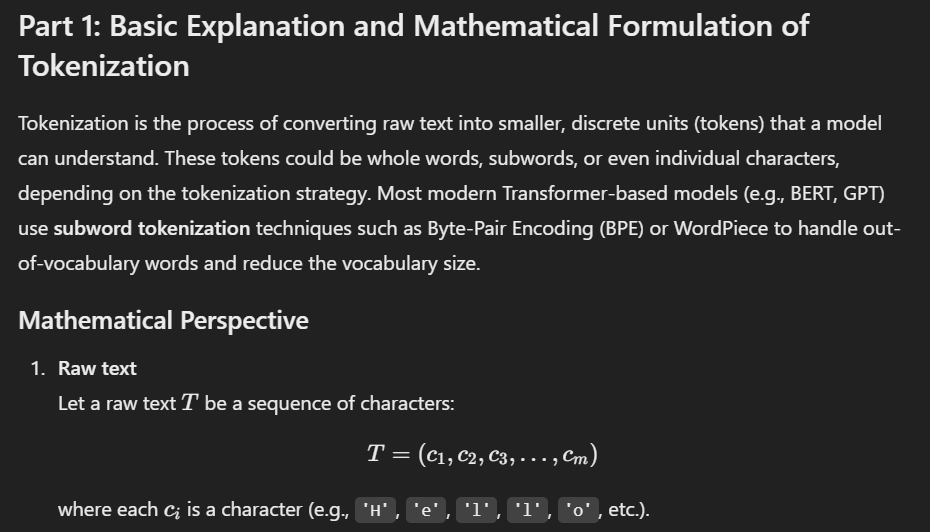

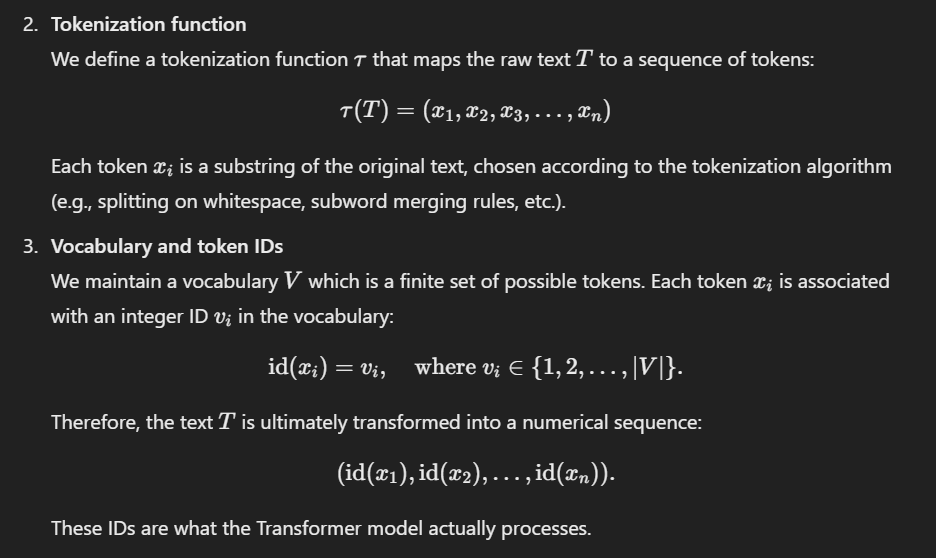

## Part 2: Step-by-Step Code Demonstration

Below are two demonstrations of tokenization:
1. **Manual (illustrative) tokenization**: a simple example to show how one might split text on whitespace and assign IDs manually.  
2. **Transformer-based tokenization**: using a pretrained model’s tokenizer (e.g., BERT) to generate tokens and their IDs in practice.

### A) Manual (Illustrative) Tokenization with Simplified Steps


In [ ]:
# Example: manual whitespace tokenization + a tiny vocabulary map

# 1) Define raw text
text = "Hello how are you"

# 2) Simple tokenization (split on spaces)
tokens = text.split()  # ["Hello", "how", "are", "you"]

# 3) Define a minimal vocabulary dictionary (token -> ID)
# In practice, these IDs might come from a learned vocabulary in a large model
vocab_dict = {
    "[UNK]": 0,   # unknown token
    "Hello": 1,
    "how": 2,
    "are": 3,
    "you": 4
}

# 4) Convert each token to its ID in the vocabulary
token_ids = []
for t in tokens:
    # If token not in vocab, use [UNK]
    token_id = vocab_dict.get(t, vocab_dict["[UNK]"])
    token_ids.append(token_id)

print("Tokens:", tokens)         # e.g., ["Hello", "how", "are", "you"]
print("Token IDs:", token_ids)   # e.g., [1, 2, 3, 4]

Tokens: ['Hello', 'how', 'are', 'you']
Token IDs: [1, 2, 3, 4]


This manual approach is typically not used in real-world applications—especially for large corpora—since it does not handle rare words or morphological variations well. Modern Transformers use subword tokenization (e.g., WordPiece, BPE) to split words like `"unbelievable"` into smaller pieces such as `["un", "##believ", "##able"]`, thereby reducing out-of-vocabulary issues.

---

### B) Using a Transformer Model’s Tokenizer (e.g., BERT)

We will use the [Hugging Face `transformers`](https://github.com/huggingface/transformers) library for a real tokenization demonstration. BERT’s tokenizer (WordPiece-based) will show how subwords are generated.

In [ ]:
import torch
from transformers import BertTokenizer
# Load the tokenizer for "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# Let's use a sentence with punctuation and uncommon words
text = "Hello! This is an unbelievably interesting example."
# The 'encode_plus' or '__call__' method performs tokenization, subword splitting,
# and can return attention masks, segment IDs, etc.
encoded_inputs = tokenizer(text, return_tensors="pt")

print("Encoded inputs dictionary keys:", encoded_inputs.keys())
# Typically: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

# Let's look at input_ids specifically
input_ids = encoded_inputs["input_ids"]
print("input_ids:", input_ids)

#input_ids are the numerical IDs of tokens from the BERT vocabulary.
#token_type_ids (if returned) can be used to distinguish between multiple sequences in tasks like QA.
#attention_mask indicates which tokens are padding (1 for real tokens, 0 for padded tokens).

#View the Actual Tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print("Tokens (subwords) from BERT Tokenizer:")
print(tokens)

#You may see subwords prefixed with ##. This indicates that the subword is a continuation of a preceding token.
#For instance, "unbelievably" might appear as ["un", "##believ", "##ably"].

##Putting It All Together
print("Original text:", text)
print("Token IDs:", input_ids[0].tolist())
print("Decoded tokens:", tokens)

#[CLS] and [SEP] are special tokens used by BERT for classification tasks and sequence boundaries.
#Notice how the word unbelievably was broken into subword pieces: 'un', '##believ', '##ab', '##ly'.

Encoded inputs dictionary keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
input_ids: tensor([[ 101, 7592,  999, 2023, 2003, 2019, 4895, 8671, 2666, 3567, 6321, 5875,
         2742, 1012,  102]])
Tokens (subwords) from BERT Tokenizer:
['[CLS]', 'hello', '!', 'this', 'is', 'an', 'un', '##bel', '##ie', '##va', '##bly', 'interesting', 'example', '.', '[SEP]']
Original text: Hello! This is an unbelievably interesting example.
Token IDs: [101, 7592, 999, 2023, 2003, 2019, 4895, 8671, 2666, 3567, 6321, 5875, 2742, 1012, 102]
Decoded tokens: ['[CLS]', 'hello', '!', 'this', 'is', 'an', 'un', '##bel', '##ie', '##va', '##bly', 'interesting', 'example', '.', '[SEP]']


#Summary

*   Mathematically, tokenization can be seen as a function that transforms a sequence of characters into a sequence of tokens, which are then mapped to integer IDs in a vocabulary.
*   Manually, one can split on whitespace and map tokens to IDs for a toy example.
*   Practically, Transformer-based models (like BERT) use more sophisticated subword tokenization methods to handle a large variety of words and reduce issues with out-of-vocabulary tokens.





# 3. Attention mechanisms:

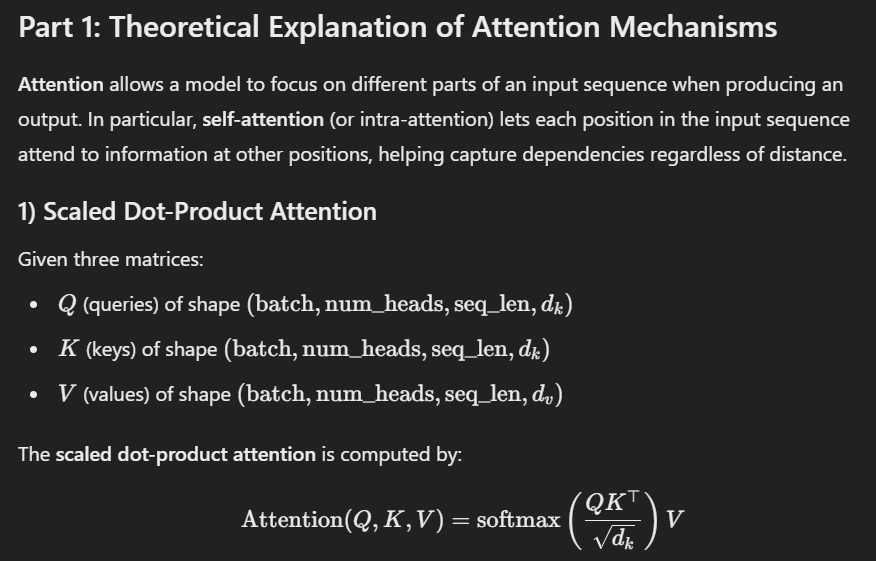

---

### 1. **Query (Q)**:
   - **Definition**:  
     The **Query** represents the vector that specifies what kind of information we are looking for.  
     For each token in the input sequence, a query vector is generated to find the relevance of this token to others in the sequence.
   - **Dimension**:  
     Typically, the same as the model's hidden size, dk.
   - **Example**:  
     Suppose we are processing the sentence:  
     **"The cat chased the mouse."**  
     When focusing on the word **"chased"**, the query vector might represent the search for **contextual relationships**, such as:  
     - "Who performed the action?" (subject: **"cat"**)  
     - "What is the action affecting?" (object: **"mouse"**)  

---

### 2. **Key (K)**:
   - **Definition**:  
     The **Key** is like an "address" that allows the model to locate specific pieces of information.  
     Each token in the sequence is associated with a key vector, which is compared with the query to calculate their similarity (relevance).
   - **Dimension**:  
     Usually matches the query vector size, dk.
   - **Example**:  
     For the word **"cat"**, the key vector might encode its **semantic and grammatical information**, such as:  
     - "Is it the subject of the sentence?"  
     - "What role does it play in the action?"  
     When the query for "chased" is compared with the key for "cat," the model determines whether **"cat"** is relevant to the action **"chased"**.

---

### 3. **Value (V)**:
   - **Definition**:  
     The **Value** contains the actual information or representation that we want to retrieve.  
     The values are weighted and combined based on the relevance (or attention score) determined by the query and key.
   - **Dimension**:  
     Can differ from dk, but often matches dv, the size of the value vector.
   - **Example**:  
     For the word **"cat"**, the value vector might include:  
     - The word's meaning (e.g., "a feline animal").  
     - Contextual information (e.g., "subject of the action").  
     If "chased" finds "cat" relevant, its value is weighted accordingly and contributes to the final representation.

---

### Relationship Between Q, K, and V

#### 1. **Attention Scores**:
   - **Formula**:  
     Attention is computed using a compatibility function between the **query** and the **key**.  
     For **Scaled Dot-Product Attention**:
     
     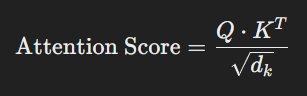

   - **Example**:  
     If the query vector for **"chased"** is \([0.5, 0.8, 0.1]\) and the key vector for **"cat"** is \([0.4, 0.6, 0.3]\), the dot product would give a similarity score:  
     0.5×0.4+0.8×0.6+0.1×0.3=0.65
     
     This score is normalized (e.g., using softmax) to determine how much attention **"chased"** should give to **"cat"**.

#### 2. **Weighting the Values**:
   - These attention scores (after applying softmax) are used to weight the corresponding **value** vectors.
   - **Example**:  
     If the attention scores for the tokens are:
     - **"The"**: 0.1
     - **"cat"**: 0.5
     - **"chased"**: 0.2
     - **"mouse"**: 0.2  
     Then, the final representation of **"chased"** is a weighted sum of the value vectors:  
 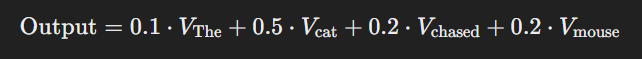

---

### Intuition:
- Think of **Q**, **K**, and **V** as parts of a lookup process:
  - **Q (Query)**: "What am I looking for?"  
    Example: **"What does 'chased' need to know?"**
  - **K (Key)**: "What do I have to offer?"  
    Example: **"I am 'cat'; I am the subject."**
  - **V (Value)**: "What information should I return if there's a match?"  
    Example: **"Here’s the detailed representation of 'cat'."**

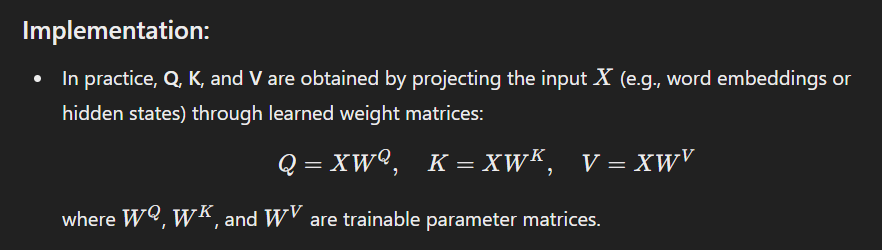

---

### Why is this important?
This mechanism allows the model to dynamically focus on relevant parts of the input sequence, enabling **context-aware representations**. For instance, in **machine translation**, the attention mechanism lets the model focus on the correct source words when generating each target word.

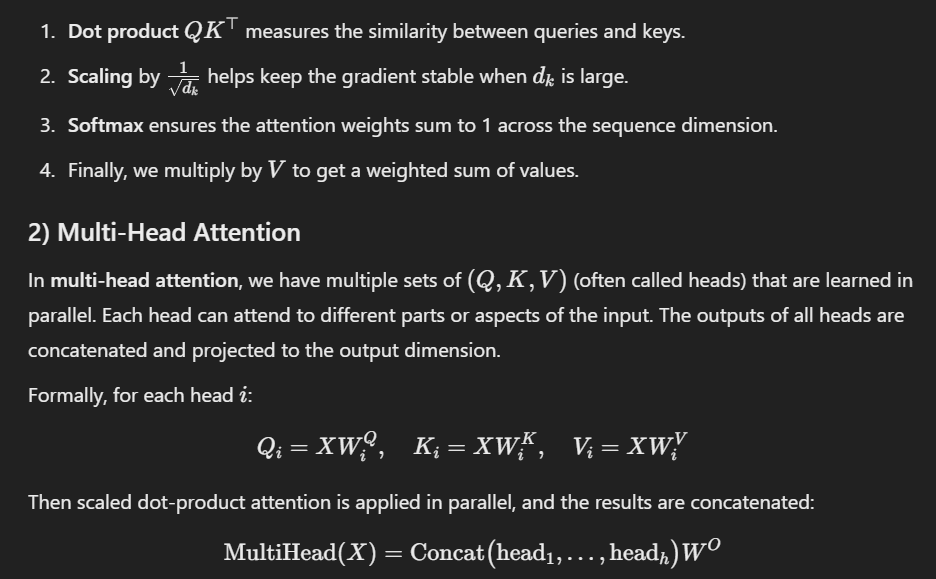

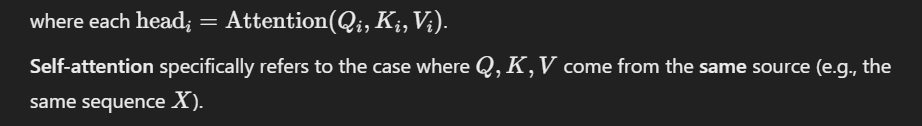

## Part 2: Step-by-Step Code Demonstration

We will illustrate **scaled dot-product attention** in two ways:

1. **Manual Demonstration**: We explicitly implement the formula.  
2. **Using PyTorch’s `nn.MultiheadAttention`**: We show how a built-in layer can handle multi-head self-attention.

---

### A) Manual Demonstration of Scaled Dot-Product Attention


In [ ]:
import torch
import torch.nn.functional as F

def scaled_dot_product_attention(Q, K, V, mask=None):
    """
    Q shape: [batch_size, seq_len, d_k]
    K shape: [batch_size, seq_len, d_k]
    V shape: [batch_size, seq_len, d_v]
    mask shape (optional): [batch_size, seq_len, seq_len]
    Returns: [batch_size, seq_len, d_v]
    """
    d_k = Q.size(-1)  # dimension of the key

    # 1) Compute raw attention scores: QK^T
    # => shape: [batch_size, seq_len, seq_len]
    scores = torch.bmm(Q, K.transpose(1, 2))

    # 2) Scale
    scores = scores / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))

    # 3) Optional mask (for attention masking, e.g., causal or padding)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, float('-inf'))

    # 4) Softmax to get attention probabilities
    attn_weights = F.softmax(scores, dim=-1)  # [batch_size, seq_len, seq_len]

    # 5) Multiply by V
    # => shape: [batch_size, seq_len, d_v]
    output = torch.bmm(attn_weights, V)

    return output, attn_weights

# Example usage:
batch_size = 2
seq_len = 4
d_k = 8
d_v = 8

# Sample Q, K, V
Q = torch.rand(batch_size, seq_len, d_k)
K = torch.rand(batch_size, seq_len, d_k)
V = torch.rand(batch_size, seq_len, d_v)

# No mask in this basic demo
output, attn_weights = scaled_dot_product_attention(Q, K, V)

print("Output: ",output)
print("Attention weights: ",attn_weights)

print("Output shape:", output.shape)         # [2, 4, 8]
print("Attention weights shape:", attn_weights.shape)  # [2, 4, 4]

Output:  tensor([[[0.4377, 0.3760, 0.5086, 0.5022, 0.6021, 0.3898, 0.5710, 0.8546],
         [0.4233, 0.3615, 0.4817, 0.5012, 0.6036, 0.4080, 0.5821, 0.8510],
         [0.4514, 0.3861, 0.5074, 0.4976, 0.5956, 0.4036, 0.5606, 0.8613],
         [0.4429, 0.3820, 0.4803, 0.4862, 0.6013, 0.4319, 0.5698, 0.8579]],

        [[0.5981, 0.7157, 0.5633, 0.6374, 0.3474, 0.3302, 0.5562, 0.3356],
         [0.5982, 0.7158, 0.5562, 0.6179, 0.3471, 0.3462, 0.5477, 0.3427],
         [0.5701, 0.7238, 0.5324, 0.6277, 0.3462, 0.3450, 0.5221, 0.3431],
         [0.5965, 0.7176, 0.5635, 0.6348, 0.3503, 0.3341, 0.5542, 0.3393]]])
Attention weights:  tensor([[[0.2455, 0.3290, 0.2426, 0.1828],
         [0.2703, 0.2795, 0.2531, 0.1972],
         [0.2245, 0.3235, 0.2492, 0.2028],
         [0.2519, 0.2682, 0.2436, 0.2363]],

        [[0.2108, 0.2416, 0.2209, 0.3267],
         [0.2326, 0.2198, 0.2461, 0.3015],
         [0.2107, 0.2740, 0.2397, 0.2756],
         [0.2187, 0.2382, 0.2205, 0.3226]]])
Output shape: torch

#### Notes

- We used `torch.bmm` for batch matrix multiplication.  
- `mask` can be applied to avoid attending to certain positions (for instance, future tokens in a decoder or padded positions).

---

### B) Using PyTorch’s `nn.MultiheadAttention` for Self-Attention

PyTorch provides a convenient layer called `nn.MultiheadAttention` that handles:
- Linear projections for **Q, K and V**.  
- Scaling and softmax.  
- Multiple heads.  
- Output linear projection.

Here’s an example of using `MultiheadAttention` in a self-attention scenario, where the input serves as both query and key/value.

In [ ]:
import torch
import torch.nn as nn

# Suppose we want 2 heads, each with dimension d_model=16
# so each head has dimension d_model/num_heads=8
multihead_attn = nn.MultiheadAttention(
    embed_dim=16,   # total dimension = 16
    num_heads=2,    # 2 heads
    batch_first=True  # so input shape can be [batch, seq, embed_dim]
)

# Create sample input
batch_size = 2
seq_len = 5
d_model = 16  # must match embed_dim in MultiheadAttention

x = torch.rand(batch_size, seq_len, d_model)  # [2, 5, 16]

# Self-attention: Q, K, V are all x
attn_output, attn_weights = multihead_attn(query=x, key=x, value=x)

print("attn_output: ",attn_output)
print("attn_output shape:", attn_output.shape)
# [2, 5, 16] (batch_size, seq_len, d_model)

print("attn_weights:", attn_weights)
print("attn_weights shape:", attn_weights.shape)
# [2, 2, 5, 5] => (batch_size, num_heads, seq_len, seq_len)

attn_output:  tensor([[[-0.1033,  0.1800, -0.0241,  0.2800,  0.1709, -0.3984,  0.3141,
          -0.1791,  0.2146, -0.0081,  0.2459,  0.1162, -0.0763,  0.3204,
           0.0130, -0.3781],
         [-0.1052,  0.1817, -0.0283,  0.2812,  0.1661, -0.4038,  0.3142,
          -0.1788,  0.2142, -0.0102,  0.2483,  0.1153, -0.0720,  0.3235,
           0.0133, -0.3791],
         [-0.1080,  0.1791, -0.0278,  0.2797,  0.1706, -0.4041,  0.3175,
          -0.1780,  0.2131, -0.0117,  0.2486,  0.1164, -0.0750,  0.3219,
           0.0186, -0.3770],
         [-0.1050,  0.1794, -0.0246,  0.2773,  0.1692, -0.4017,  0.3127,
          -0.1775,  0.2135, -0.0087,  0.2494,  0.1155, -0.0744,  0.3218,
           0.0172, -0.3775],
         [-0.1074,  0.1776, -0.0283,  0.2783,  0.1708, -0.3993,  0.3150,
          -0.1769,  0.2120, -0.0120,  0.2478,  0.1148, -0.0757,  0.3194,
           0.0174, -0.3779]],

        [[-0.1917,  0.2344, -0.0632,  0.3413,  0.1368, -0.4549,  0.3940,
          -0.2276,  0.3444, -0.1173,

- attn_output is the transformed representation after applying multi-head self-attention to x.
- attn_weights gives the attention weights for each head.

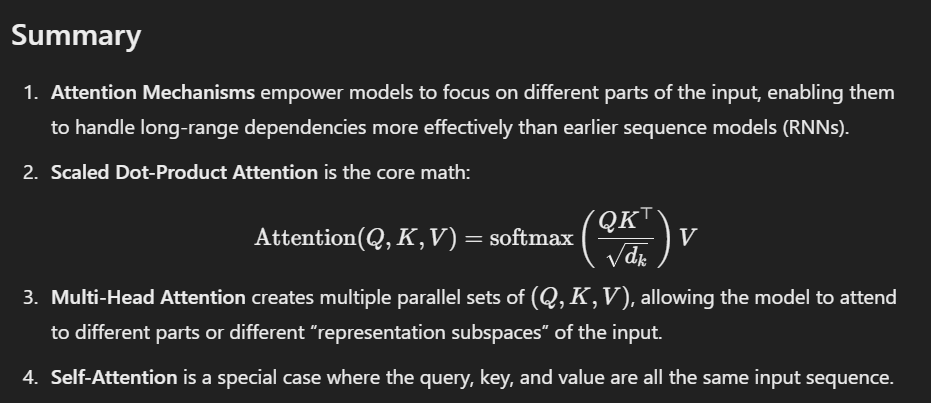

#4. Text Generation

###4.1. Greedy Search

Greedy search selects the token with the highest probability at each step, aiming for the most likely sequence. While straightforward, it often results in repetitive or short outputs.

Trade-offs:

*   May produce repetitive or generic text.
*   Lacks diversity in generated content.



In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load pre-trained model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.to("cuda" if torch.cuda.is_available() else "cpu")

# Encode input context
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt").to(model.device)

# Generate text using greedy search
greedy_output = model.generate(input_ids, max_new_tokens=50)
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger


###4.2. Beam Search

Beam search maintains multiple hypotheses (beams) at each generation step, expanding the search space to find more likely sequences. This method reduces the risk of missing high-probability sequences that greedy search might overlook.

Trade-offs:

*   Computationally more intensive due to multiple beams.
*   Can still produce repetitive text without additional constraints.



In [2]:
# Generate text using beam search
beam_output = model.generate(input_ids, max_new_tokens=50, num_beams=5, early_stopping=True)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, it was said, there would be a time when the world would be a better place.

It was a time when the world would be a better place.

It was a time when the world would be a better place.



###4.3. Sampling-Based Methods

Sampling introduces randomness into the generation process, allowing for more diverse and creative outputs. Two common techniques are:


*   Top-k Sampling: Selects the next token from the top k most probable tokens.

In [3]:
# Generate text using top-k sampling
top_k_output = model.generate(input_ids, max_new_tokens=50, do_sample=True, top_k=50)
print(tokenizer.decode(top_k_output[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, a great force had come to the moon, as a beacon of light, and a beacon of light shone down upon him. Now it was the day of a day, and the moon stood with him. The angel of God had said to him


* Nucleus (Top-p) Sampling: Selects the next token from the smallest set of tokens whose cumulative probability exceeds a threshold p.

In [4]:
# Generate text using nucleus sampling
top_p_output = model.generate(input_ids, max_new_tokens=50, do_sample=True, top_p=0.9)
print(tokenizer.decode(top_p_output[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, my eyes were opened by something I never imagined I'd seen before, a young man that had been the sole protector of my family and my wife. He was my second cousin. I was a small girl, but no one could ever remember the


Trade-offs:

* Introduces randomness, which can lead to less predictable outputs.
* Requires careful tuning of parameters (k and p) to balance creativity and coherence.

###4.4. Contrastive Search

Contrastive search aims to generate human-like text by balancing the model's probability distribution and the similarity to the previous context. It helps maintain semantic coherence and reduces the likelihood of generating nonsensical or repetitive text.

Trade-offs:

* May require more computational resources.
* Needs careful tuning of the `penalty_alpha` parameter to balance coherence and diversity.

In [5]:
 # Generate text using contrastive search
contrastive_output = model.generate(input_ids, max_new_tokens=50, penalty_alpha=0.6, top_k=4)
print(tokenizer.decode(contrastive_output[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, the world was full of people who were willing to sacrifice their lives for the cause of peace.

The world was full of people who were willing to sacrifice their lives for the cause of peace.

The world was full of people who
